In [47]:
from osgeo import gdal
import numpy as np
import math
import rasterio as rio
import xarray as xr
import holoviews as hv
import hvplot.xarray
import netCDF4 as nc
import pandas as pd
import h5netcdf
import matplotlib.pyplot as plt
import rioxarray as rioxr
import os

In [42]:
fn = '/Users/spai/Downloads/EMIT_L2A_RFL_001_20230124T091938_2302406_008.nc'
ds = nc.Dataset(fn)

In [55]:
xrds = xr.open_dataset(fn)
xrds

<xarray.Dataset>
Dimensions:      (downtrack: 2240, crosstrack: 1242, bands: 285)
Dimensions without coordinates: downtrack, crosstrack, bands
Data variables:
    reflectance  (downtrack, crosstrack, bands) float32 ...
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             -32.47462939227153
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [ 2.73531855e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [58]:
xrds["reflectance"]

<xarray.DataArray 'reflectance' (downtrack: 2240, crosstrack: 1242, bands: 285)>
[792892800 values with dtype=float32]
Dimensions without coordinates: downtrack, crosstrack, bands
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [59]:
xrds.reflectance.dims

('downtrack', 'crosstrack', 'bands')

In [60]:
xrds.reflectance.coords

Coordinates:
    *empty*

In [61]:
xrds.reflectance.downtrack

<xarray.DataArray 'downtrack' (downtrack: 2240)>
array([   0,    1,    2, ..., 2237, 2238, 2239])
Dimensions without coordinates: downtrack

In [62]:
xrds.reflectance.crosstrack

<xarray.DataArray 'crosstrack' (crosstrack: 1242)>
array([   0,    1,    2, ..., 1239, 1240, 1241])
Dimensions without coordinates: crosstrack

In [63]:
xrds.reflectance.bands

<xarray.DataArray 'bands' (bands: 285)>
array([  0,   1,   2, ..., 282, 283, 284])
Dimensions without coordinates: bands

In [43]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'downtrack', size = 2240
<class 'netCDF4._netCDF4.Dimension'>: name = 'crosstrack', size = 1242
<class 'netCDF4._netCDF4.Dimension'>: name = 'bands', size = 285
<class 'netCDF4._netCDF4.Dimension'>: name = 'ortho_y', size = 2628
<class 'netCDF4._netCDF4.Dimension'>: name = 'ortho_x', size = 3122


In [44]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 reflectance(downtrack, crosstrack, bands)
    _FillValue: -9999.0
    long_name: Surface Reflectance
    units: unitless
unlimited dimensions: 
current shape = (2240, 1242, 285)
filling on


In [45]:
print(ds.summary)

The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L2A estimated surface reflectances and geolocation data. Reflectance estimates are created using an Optimal Estimation technique - see ATBD for details. Reflectance v

In [46]:
print(ds.westernmost_longitude, ds.southernmost_latitude, ds.easternmost_longitude, ds.northernmost_latitude)

27.3531855143319 -32.47462939227153 29.04603544257228 -31.0496423290378


In [26]:
fp='/Users/spai/Downloads/modis.hdf'

In [27]:
ds = nc.Dataset(fp, engine='netcdf4')
ds

OSError: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: '/Users/spai/Downloads/modis.hdf'

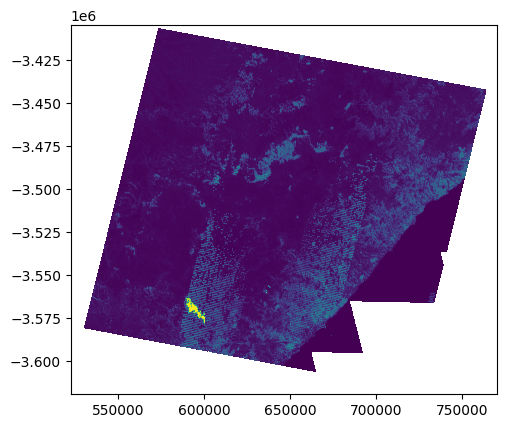

In [9]:
import rasterio
from rasterio.plot import show
fp = r'/Users/spai/Downloads/lesotho/p169r082_TC_2015.tif'
img = rasterio.open(fp)
show(img)
landsat = img.read(1)

In [10]:
img.crs

CRS.from_epsg(32635)

In [11]:
img.bounds

BoundingBox(left=522585.0, bottom=-3619515.0, right=770115.0, top=-3404685.0)

In [18]:
da= rioxr.open_rasterio(r'/Users/spai/Downloads/lesotho/p169r082_TC_2015.tif')
da

<xarray.DataArray (band: 1, y: 7161, x: 8251)>
[59085411 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.226e+05 5.226e+05 ... 7.701e+05 7.701e+05
  * y            (y) float64 -3.405e+06 -3.405e+06 ... -3.619e+06 -3.62e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

In [28]:
da.hvplot.image(aspect = 'equal', rasterize= True)

:DynamicMap   [band]
   :Image   [y,x]   (value)

(array([23578173.,  4500191.,  1254471.,   568578.,   451549.,   478320.,
          469013.,   673280.,   666599.,   193116.]),
 array([ 1. ,  9.4, 17.8, 26.2, 34.6, 43. , 51.4, 59.8, 68.2, 76.6, 85. ]),
 <BarContainer object of 10 artists>)

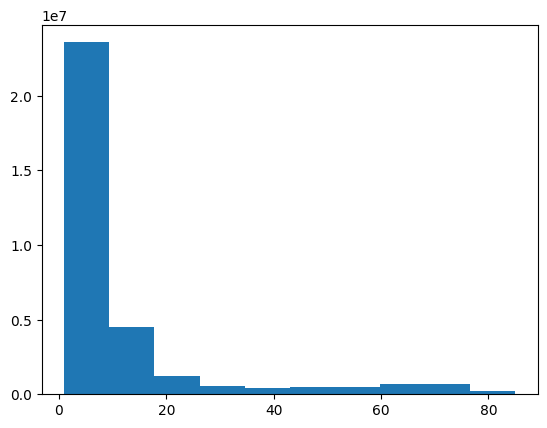

In [38]:
plt.hist(landsat[(landsat >0) & (landsat <100)], 10)

In [39]:
landsat[(landsat >25) & (landsat <100)]

array([30, 32, 33, ..., 45, 28, 50], dtype=uint8)

(array([463826., 368462., 333637., 316492., 328138., 379951., 459694.,
        518823., 365228.,  55700.]),
 array([26. , 31.9, 37.8, 43.7, 49.6, 55.5, 61.4, 67.3, 73.2, 79.1, 85. ]),
 <BarContainer object of 10 artists>)

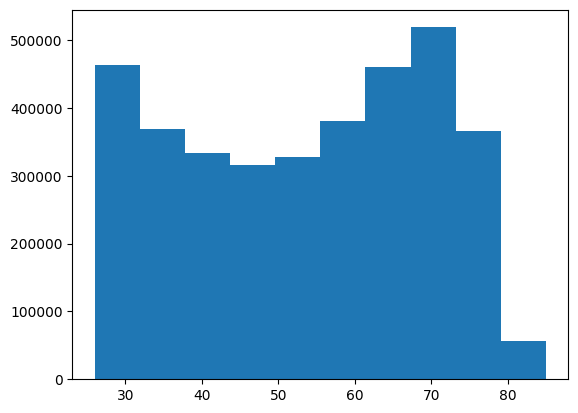

In [41]:
plt.hist(landsat[(landsat >25) & (landsat <100)], 10)

In [29]:
landsat

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [49]:
metadata = os.popen('gdalinfo /Users/spai/Downloads/lesotho/p169r082_TC_2015.tif').read()
print(metadata)

Driver: GTiff/GeoTIFF
Files: /Users/spai/Downloads/lesotho/p169r082_TC_2015.tif
Size is 8251, 7161
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 35N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 35N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",27,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
       

In [52]:
filename=gdal.Open("/Users/spai/Downloads/lesotho/p169r082_TC_2015.tif")

metadata=filename.GetMetadata()

print(metadata)

{'AREA_OR_POINT': 'Area'}


In [53]:
band = filename.GetRasterBand(1)
band.GetMetadata()

{}

In [64]:
xrds.reflectance.data

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

In [65]:
type(xrds.reflectance.data)

numpy.ndarray

In [66]:
xrds.summary

"The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\\n\\nThis file contains L2A estimated surface reflectances and geolocation data. Reflectance estimates are created using an Optimal Estimation technique - see ATBD for details. Reflectanc

In [67]:
print(xrds.westernmost_longitude, xrds.southernmost_latitude, xrds.easternmost_longitude, xrds.northernmost_latitude)

27.3531855143319 -32.47462939227153 29.04603544257228 -31.0496423290378


In [70]:
xrds.sel(crosstrack=slice(10,50)).sel(downtrack=slice(200,400))

<xarray.Dataset>
Dimensions:      (downtrack: 200, crosstrack: 40, bands: 285)
Dimensions without coordinates: downtrack, crosstrack, bands
Data variables:
    reflectance  (downtrack, crosstrack, bands) float32 0.01726 ... 0.1199
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             -32.47462939227153
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [ 2.73531855e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [71]:
-3404685.000/-30.77495

110631.69883297941

In [72]:
-3619515.000/-32.713167

110643.98014414197

In [73]:
522585.000/27.236022

19187.273383756263

In [74]:
770115.000/29.821389

25824.24983625008

In [76]:
West_overlap = max([xrds.westernmost_longitude, 27.236022])
East_overlap = min([xrds.easternmost_longitude, 29.880678])
North_overlap = min([xrds.northernmost_latitude, -30.744469])
South_overlap = max([xrds.southernmost_latitude, -32.713167])
print(West_overlap, East_overlap, North_overlap, South_overlap)

27.3531855143319 29.04603544257228 -31.0496423290378 -32.47462939227153


In [78]:
da.x

<xarray.DataArray 'x' (x: 8251)>
array([522600., 522630., 522660., ..., 770040., 770070., 770100.])
Coordinates:
  * x            (x) float64 5.226e+05 5.226e+05 ... 7.701e+05 7.701e+05
    spatial_ref  int64 0

In [81]:
max(da.x)

<xarray.DataArray 'x' ()>
array(770100.)
Coordinates:
    x            float64 7.701e+05
    spatial_ref  int64 0

In [85]:
int(max(da.x)) #easternmost coord

770100

In [86]:
int(min(da.x)) #westernnmost coord

522600

In [88]:
int(max(da.y)) #northernmost coord

-3404700

In [89]:
int(min(da.y)) #southernmost coord

-3619500

In [91]:
North_overlap_coord = ((int(max(da.y))-int(min(da.y)))/((-30.744469)-(-32.713167)))*(North_overlap-(-32.713167))+int(min(da.y))
North_overlap_coord

-3437996.74286118

In [92]:
South_overlap_coord = ((int(max(da.y))-int(min(da.y)))/((-30.744469)-(-32.713167)))*(South_overlap-(-32.713167))+int(min(da.y))
South_overlap_coord

-3593473.723679267

In [93]:
East_overlap_coord = ((int(max(da.x))-int(min(da.x)))/((29.880678)-(27.236022)))*(East_overlap-(27.236022))+int(min(da.x))
East_overlap_coord

691990.0178460409

In [94]:
West_overlap_coord = ((int(max(da.x))-int(min(da.x)))/((29.880678)-(27.236022)))*(West_overlap-(27.236022))+int(min(da.x))
West_overlap_coord

533564.7416515214

In [105]:
overlap_box= da.sel(x=slice(West_overlap_coord,East_overlap_coord)).sel(y=slice(North_overlap_coord,South_overlap_coord))
overlap_box
#array w overlap

<xarray.DataArray (band: 1, y: 5183, x: 5281)>
[27371423 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.336e+05 5.336e+05 5.336e+05 ... 6.92e+05 6.92e+05
  * y            (y) float64 -3.438e+06 -3.438e+06 ... -3.593e+06 -3.593e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

In [97]:
da.sel(x=slice(West_overlap_coord,East_overlap_coord))

<xarray.DataArray (band: 1, y: 7161, x: 5281)>
[37817241 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.336e+05 5.336e+05 5.336e+05 ... 6.92e+05 6.92e+05
  * y            (y) float64 -3.405e+06 -3.405e+06 ... -3.619e+06 -3.62e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

In [99]:
da.sel(y=slice(North_overlap_coord,South_overlap_coord))

<xarray.DataArray (band: 1, y: 5183, x: 8251)>
[42764933 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.226e+05 5.226e+05 ... 7.701e+05 7.701e+05
  * y            (y) float64 -3.438e+06 -3.438e+06 ... -3.593e+06 -3.593e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

In [96]:
da

<xarray.DataArray (band: 1, y: 7161, x: 8251)>
[59085411 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.226e+05 5.226e+05 ... 7.701e+05 7.701e+05
  * y            (y) float64 -3.405e+06 -3.405e+06 ... -3.619e+06 -3.62e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     255
    scale_factor:   1.0
    add_offset:     0.0

In [107]:
plt.hist(overlap_box[(overlap_box >25) & (overlap_box <100)], 10)

IndexError: 3-dimensional boolean indexing is not supported. 

(array([22296203.,   740444.,  1052019.,   117205.,        0.,        0.,
               0.,        0.,   489971.,  2675581.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

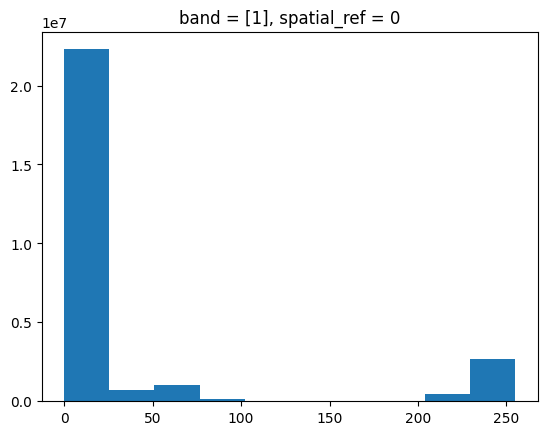

In [112]:
overlap_box.plot.hist()